### Codio Activity 3.5: Sorting and Aggregating

This activity focuses on sorting the results of a `groupby` operation. The dataset is again the `gapminder` data from plotly.  Your tasks involve aggregating and sorting as well as plotting summary results using `matplotlib`, `seaborn`, and `plotly`.

#### Index:

- [Problem 1](#Problem-1:-Lowest-to-Highest-Average-Life-Expectancy)
- [Problem 2](#Problem-2:-Sorting-GDP)
- [Problem 3](#Problem-3:-Sorting-Results-of-Multiple-Aggregates)
- [Problem 4](#Problem-4:-Sorting-Custom-Outputs)
- [Problem 5](#Problem-5:-Applying-the-\`column_range\`-function)

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gapminder = px.data.gapminder()

In [3]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


### Problem 1: Highet to Lowest Average Life Expectancy

Use the `groupby` method on the `gapminder` DataFrame to group the values in the `continent` column. Use a double square bracket notation to apply this operation on the `lifeExp` column. Next, use the pandas function `mean()` to compute the mean value. Finally, use the `sort_values()` function to sort your results by `lifeExp`. Inside the `sort_values()` function, set the `ascending` argument equal to `False`.

Assign your results as a DataFrame to `ans1` below.  

In [9]:
ans1 = gapminder.groupby('continent')[['lifeExp']].mean().sort_values(by = 'lifeExp', ascending = False)
ans1

,lifeExp
continent,
Oceania,74.326208
Europe,71.903686
Americas,64.658737
Asia,60.064903
Africa,48.865330


### Problem 2: Sorting GDP

Which country has the highest `gdpPercap`?  Use `groupby` to answer this question and assign your answer as a one word string representing the name of the country to `ans2` below.

In [20]:
ans2 = gapminder.groupby('country')[['gdpPercap']].mean().sort_values('gdpPercap', ascending = False).reset_index().iloc[0,0]
ans2

'Kuwait'

### Problem 3: Sorting Results of Multiple Aggregates

Use the `groupby` method on the `gapminder` DataFrame to group the values in the `continent` column. Next, use the pandas function `agg()` with argument equal to `['mean', 'median', 'std']` to compute the mean, the median, and the standard deviation. Use a double square bracket notation to apply this operation on the `lifeExp` column.  Save this DataFrame to `ans3a` below.  


To sort the resulting values by medians from greatest to least, first flatten and rename the columns using the code:

```python
ans3a.columns = [" ".join(c) for c in ans3a.columns.to_flat_index()]
```

Finally, use the `sort_values` function on `ans3a` to sort the results by `lifeExp median`. Inside the `sort_values` function set the argument `ascending` equal to `False`. Assign your result to `ans3b`.

In [47]:
ans3a = gapminder.groupby('continent')[['lifeExp']].agg(['mean','median','std'])
ans3a

lifeExp                    
                mean   median        std
continent                               
Africa     48.865330  47.7920   9.150210
Americas   64.658737  67.0480   9.345088
Asia       60.064903  61.7915  11.864532
Europe     71.903686  72.2410   5.433178
Oceania    74.326208  73.6650   3.795611

In [42]:
display(ans3a.columns)
type(ans3a.columns)
# Convert a MultiIndex to an Index of Tuples containing the level values.

MultiIndex([('lifeExp',   'mean'),
            ('lifeExp', 'median'),
            ('lifeExp',    'std')],
           )

pandas.core.indexes.multi.MultiIndex

In [45]:
ans3a.columns.to_flat_index()

Index([('lifeExp', 'mean'), ('lifeExp', 'median'), ('lifeExp', 'std')], dtype='object')

In [48]:
display(ans3a.columns[0])
ans3a.columns.to_flat_index()[0]

('lifeExp', 'mean')

('lifeExp', 'mean')

In [49]:
[x for x in ans3a.columns]

[('lifeExp', 'mean'), ('lifeExp', 'median'), ('lifeExp', 'std')]

In [51]:
y = ('lifeExp', 'mean')
" :: ".join(y)

'lifeExp :: mean'

In [31]:
ans3a.columns = [' '.join(c) for c in ans3a.columns.to_flat_index()]
ans3a

,lifeExp mean,lifeExp median,lifeExp std
continent,,,
Africa,48.865330,47.7920,9.150210
Americas,64.658737,67.0480,9.345088
Asia,60.064903,61.7915,11.864532
Europe,71.903686,72.2410,5.433178
Oceania,74.326208,73.6650,3.795611


In [32]:
ans3b = ans3a.sort_values('lifeExp median', ascending = False)
ans3b

,lifeExp mean,lifeExp median,lifeExp std
continent,,,
Oceania,74.326208,73.6650,3.795611
Europe,71.903686,72.2410,5.433178
Americas,64.658737,67.0480,9.345088
Asia,60.064903,61.7915,11.864532
Africa,48.865330,47.7920,9.150210


### Problem 4: Sorting Custom Outputs

Complete the defintion of the function `column_range` according to the instructions below:

- The `column_range` function should take `col` as input argument.
- The `column_range` function should return the difference between the maximum and the minimum value of `col.

In [33]:
def column_range(col):
    return col.max() - col.min()


In [34]:
column_range(gapminder['lifeExp'])

59.00399999999999

### Problem 5: Applying the `column_range` function

Use the `groupby` method on the `gapminder` DataFrame to group the values in the `continent` column.  Use a double square bracket notation to apply this operation on the `gdpPercap` column. Next, use the `apply()` function with argument equal to `column_range`. Finally, use the `sort_values()` function to sort the values by `gdpPercap`. Inside the `sort_values()` function set the argument `ascending` equal to `False`. Save this DataFrame to `ans5`. below.  

In [36]:
ans5 = gapminder.groupby('continent')[['gdpPercap']].apply(column_range).sort_values('gdpPercap', ascending = False)
ans5

,gdpPercap
continent,
Asia,113192.132900
Europe,48383.656975
Americas,41750.015936
Oceania,24395.771800
Africa,21710.045883


### Codio Activity 3.6: Indexing

This activity works through a similar example to the video, again using the `gapminder` dataset.  The goal is to compute what fraction of the worlds GDP did each country generate each year. 

#### Index:

- [Problem 1](#Problem-1:-Total-GDP-by-year)
- [Problem 2](#Problem-2:-Resetting-the-Index)
- [Problem 3](#Problem-3:-Computing-Share-of-GDP)
- [Problem 4](#Problem-4:-Resetting-the-Index-Again)
- [Problem 5](#Problem-5:-Plotting-the-results)

In [37]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [38]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


### Problem 1: Total GDP per Capita by year

Use the `groupby` operation on the `gapminder` DataFrame to group the `year` column. Next, use the `sum()` function to compute the total GDP per Capita (`gdpPercap`) for each year.  Assign your results as a DataFrame to `ans1` below.

In [53]:
ans61 = gapminder.groupby('year').sum()[['gdpPercap']]
ans61

,gdpPercap
year,
1952,5.289892e+05
1957,6.105160e+05
1962,6.710654e+05
1967,7.786787e+05
1972,9.613518e+05
1977,1.038470e+06
1982,1.067684e+06
1987,1.121931e+06
1992,1.158522e+06


### Problem 2: Resetting the Index

Use the `set_index()` function with argument equal to `['year', 'country']` on the `gapminder` DataFrame to compute the share of GDP. Assign the resulting DataFrame to `ans2` below.

In [55]:
ans62 = gapminder.set_index(['year','country'])
ans62

,,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,country,,,,,,
1952,Afghanistan,Asia,28.801,8425333,779.445314,AFG,4
1957,Afghanistan,Asia,30.332,9240934,820.853030,AFG,4
1962,Afghanistan,Asia,31.997,10267083,853.100710,AFG,4
1967,Afghanistan,Asia,34.020,11537966,836.197138,AFG,4
1972,Afghanistan,Asia,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...
1987,Zimbabwe,Africa,62.351,9216418,706.157306,ZWE,716
1992,Zimbabwe,Africa,60.377,10704340,693.420786,ZWE,716
1997,Zimbabwe,Africa,46.809,11404948,792.449960,ZWE,716


### Problem 3: Computing Share of GDP

Use your solutions from Problems 1 and 2 to determine each country's share of the world GDP by year. To achieve this, extract the `gdpPercap` column from the `b` DataFrame. Then, use the function `div` to divide each `gdpPercap` by the corresponding sum of `gdpPercap` for that year from the `a` DataFrame.Finally, use the 
`reset_index` function with aurgument `name` equal to `gdpPercap` to resets the index of the resulting series to turn it back into a DataFrame. 

Assign the resulting DataFrame to `ans3` below. 

Hint: The resulting DataFrame `ans3` should have the following structure:

Columns:

- year: The year of the data.
- country: The name of the country.
- gdpPercap: The share of the world GDP for the corresponding country and year.

In [67]:
a = gapminder.groupby('year').sum()[['gdpPercap']]
b = gapminder.set_index(['year','country'])
ans63 = b['gdpPercap'].div(a['gdpPercap'],level = 'year').reset_index(name = 'gdpPercap')
ans63

,year,country,gdpPercap
0,1952,Afghanistan,0.001473
1,1957,Afghanistan,0.001345
2,1962,Afghanistan,0.001271
3,1967,Afghanistan,0.001074
4,1972,Afghanistan,0.000770
...,...,...,...
1699,1987,Zimbabwe,0.000629
1700,1992,Zimbabwe,0.000599
1701,1997,Zimbabwe,0.000614
1702,2002,Zimbabwe,0.000477


In [64]:
a.head()

,gdpPercap
year,
1952,528989.198504
1957,610515.984972
1962,671065.352559
1967,778678.732651
1972,961351.759770


In [65]:
b.head()

,,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,country,,,,,,
1952,Afghanistan,Asia,28.801,8425333,779.445314,AFG,4
1957,Afghanistan,Asia,30.332,9240934,820.853030,AFG,4
1962,Afghanistan,Asia,31.997,10267083,853.100710,AFG,4
1967,Afghanistan,Asia,34.020,11537966,836.197138,AFG,4
1972,Afghanistan,Asia,36.088,13079460,739.981106,AFG,4


In [68]:
b['gdpPercap']/(a['gdpPercap'])

year  country    
1952  Afghanistan    0.001473
1957  Afghanistan    0.001345
1962  Afghanistan    0.001271
1967  Afghanistan    0.001074
1972  Afghanistan    0.000770
                       ...   
1987  Zimbabwe       0.000629
1992  Zimbabwe       0.000599
1997  Zimbabwe       0.000614
2002  Zimbabwe       0.000477
2007  Zimbabwe       0.000283
Name: gdpPercap, Length: 1704, dtype: float64

### Problem 4: Resetting the Index Again

Having computed the share of GDP by year in the earlier question using a multi-index, select the `gdpPercap` column and reset the index of the resulting series.  Assign your solution -- a DataFrame with columns `[year, country, gdpPercap]` -- to `ans4` below. 


In [63]:
temp = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index()
temp

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [69]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [74]:
gapminder.groupby('year').sum()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,6966.18200,2406957150,5.289892e+05,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1957,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,7314.05096,2664404580,6.105160e+05,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1962,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,7612.51336,2899782974,6.710654e+05,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1967,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,7906.31712,3217478384,7.786787e+05,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1972,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,8185.92888,3576977158,9.613518e+05,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1977,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,8458.96236,3930045807,1.038470e+06,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1982,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,8737.71400,4289436840,1.067684e+06,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1987,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,8976.19100,4691477418,1.121931e+06,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475
1992,AfghanistanAlbaniaAlgeriaAngolaArgentinaAustra...,AsiaEuropeAfricaAfricaAmericasOceaniaEuropeAsi...,9110.76800,5110710260,1.158522e+06,AFGALBDZAAGOARGAUSAUTBHRBGDBELBENBOLBIHBWABRAB...,60475


In [79]:
gapminder.groupby('year').sum(numeric_only=True)

,lifeExp,pop,gdpPercap,iso_num
year,,,,
1952,6966.18200,2406957150,5.289892e+05,60475
1957,7314.05096,2664404580,6.105160e+05,60475
1962,7612.51336,2899782974,6.710654e+05,60475
1967,7906.31712,3217478384,7.786787e+05,60475
1972,8185.92888,3576977158,9.613518e+05,60475
1977,8458.96236,3930045807,1.038470e+06,60475
1982,8737.71400,4289436840,1.067684e+06,60475
1987,8976.19100,4691477418,1.121931e+06,60475
1992,9110.76800,5110710260,1.158522e+06,60475


In [82]:
ans67= (gapminder.set_index(['year', 'country']) / gapminder.groupby('year').sum(numeric_only=True))[['gdpPercap']].reset_index()
ans67

,year,country,gdpPercap
0,1952,Afghanistan,0.001473
1,1957,Afghanistan,0.001345
2,1962,Afghanistan,0.001271
3,1967,Afghanistan,0.001074
4,1972,Afghanistan,0.000770
...,...,...,...
1699,1987,Zimbabwe,0.000629
1700,1992,Zimbabwe,0.000599
1701,1997,Zimbabwe,0.000614
1702,2002,Zimbabwe,0.000477


In [60]:
ans64 = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index()
ans64

TypeError: unsupported operand type(s) for /: 'str' and 'str'

### Problem 5: Plotting the results

Using the list of countries below, use the function `query` with argument equal to `country in @list_of_countries` rto query your solution to problem 4 and assign the result to `ans5a` below as a DataFrame. 


In [61]:
list_of_countries = ['China', 'United States', 'Japan', 'India', 'United Kingdom', 'Germany']

In [62]:
ans65a = (gapminder.set_index(['year', 'country'])/gapminder.groupby('year').sum())[['gdpPercap']].reset_index().query("country in @list_of_countries")
ans65a

TypeError: unsupported operand type(s) for /: 'str' and 'str'

The code below uses the Seaborn's `lineplot` function to generate a plot where the x-axis represents the year, the y-axis share of world GDP, and hue is `country`.  Add the title "Top Countries Share of GDP 1952 - 2002" and human readable x label and y label.

In [84]:
list_of_countries = ['China', 'United States', 'Japan', 'India', 'United Kingdom', 'Germany']
ans67 = ans67.query("country in @list_of_countries")


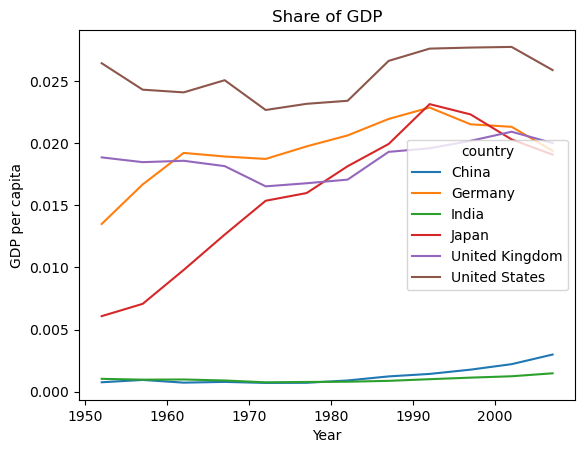

In [85]:
sns.lineplot(data = ans67, x = 'year', y = 'gdpPercap', hue = 'country')
plt.title('Share of GDP')
plt.xlabel('Year')
plt.ylabel("GDP per capita");

### Codio Activity 3.7: Filtering

This activity focuses on using the `filter` method that pandas groupby objects make available.  This function returns group elements filtered by a function passed to the argument.  Gapminder from plotly continues as our example dataset.

#### Index:

- [Problem 1](#Problem-1:-Counting-the-Original-Group-Size)
- [Problem 2](#Problem-2:-Filtering-by-Population)
- [Problem 3](#Problem-3:-What-continents-have-average-population-over-20M?)
- [Problem 4](#Problem-4:-What-countries-have-an-average-life-expectancy-over-60?)
- [Problem 5](#Problem-5:-Determining-the-percent-by-of-countries-with-average-life-expectancy-over-60-by-continent.)

In [2]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gapminder = px.data.gapminder()

In [4]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


### Example Usage

The example below separates the pandas `groupby` object from the `filter` operation.  The result of grouping on the `continent` column is bound to the `groups` variable below.  Then, a filter is applied to limit the continents to those with mean life expectancy greater than 70.  The result is a DataFrame, and in this example only Europe and Oceania remain.

In [6]:
gapminder.shape

(1704, 8)

In [8]:
groups = gapminder.groupby('continent')
groups

In [10]:
filtered_lifeExp = groups.filter(lambda x: x['lifeExp'].mean() >70)
filtered_lifeExp.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
12,Albania,Europe,1952,55.23,1282697,1601.056136,ALB,8
13,Albania,Europe,1957,59.28,1476505,1942.284244,ALB,8
14,Albania,Europe,1962,64.82,1728137,2312.888958,ALB,8
15,Albania,Europe,1967,66.22,1984060,2760.196931,ALB,8
16,Albania,Europe,1972,67.69,2263554,3313.422188,ALB,8


In [11]:
filtered_lifeExp.continent.unique()

array(['Europe', 'Oceania'], dtype=object)

### Problem 1: Counting the Original Group Size

Use the `groupby` method on the `gapminder` DataFrame to group the `continent` column. Next, use the `size()` method on these groups to determine the count of countries in each continent. Save your result as a series to `ans1` below.  

In [13]:
ans71 = gapminder.groupby('continent').size()
ans71

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

### Problem 2: Filtering by Population

Use the `groupby` method on the `gapminder` DataFrame to group the `country` column.  Next, ue the `filter` method to limit the data to countries with average population greater than 20,000,000.  Assign the resulting DataFrame to `ans2` below.

In [15]:
ans72 = gapminder.groupby('country').filter(lambda x: x['pop'].mean() > 20000000)
ans72

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
48,Argentina,Americas,1952,62.485,17876956,5911.315053,ARG,32
49,Argentina,Americas,1957,64.399,19610538,6856.856212,ARG,32
50,Argentina,Americas,1962,65.142,21283783,7133.166023,ARG,32
51,Argentina,Americas,1967,65.634,22934225,8052.953021,ARG,32
52,Argentina,Americas,1972,67.065,24779799,9443.038526,ARG,32
...,...,...,...,...,...,...,...,...
1651,Vietnam,Asia,1987,62.820,62826491,820.799445,VNM,704
1652,Vietnam,Asia,1992,67.662,69940728,989.023149,VNM,704
1653,Vietnam,Asia,1997,70.672,76048996,1385.896769,VNM,704
1654,Vietnam,Asia,2002,73.017,80908147,1764.456677,VNM,704


### Problem 3: What continents have average population over 20M?

Use the `groupby` method on the `gapminder` DataFrame to group the `continent` column. Next, use the `filter` method to limit the data to countries with average population greater than 20,000,000. Use another `groupby` method with argument equal to `continent`. To this method, chain the following `size().index.tolist()` to get a list of continent names.

Assign your answer  to `ans3` below.

In [18]:
ans73 = gapminder.groupby('continent').filter(lambda x: x['pop'].mean() > 20000000)
ans73

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538,YEM,887
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673,YEM,887
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526,YEM,887
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,YEM,887


In [19]:
ans73b = gapminder.groupby('continent').size().index.tolist()
ans73b

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

In [22]:
ans73f = gapminder.groupby('continent').filter(lambda x: x['pop'].mean() > 20000000).groupby('continent').size().index.tolist()
ans73f

['Americas', 'Asia']

### Problem 4: What countries have an average life expectancy over 60?

Use the `groupby` method on the `gapminder` DataFrame to group the `country` column. Next, use the `filter` method to limit the data to countries with average life expectancy greater than 60.

Assign your solution as a DataFrame to `ans4` below.  

In [23]:
ans74 = gapminder.groupby('country').filter(lambda x: x['lifeExp'].mean() > 60)
ans74

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
12,Albania,Europe,1952,55.230,1282697,1601.056136,ALB,8
13,Albania,Europe,1957,59.280,1476505,1942.284244,ALB,8
14,Albania,Europe,1962,64.820,1728137,2312.888958,ALB,8
15,Albania,Europe,1967,66.220,1984060,2760.196931,ALB,8
16,Albania,Europe,1972,67.690,2263554,3313.422188,ALB,8
...,...,...,...,...,...,...,...,...
1663,West Bank and Gaza,Asia,1987,67.046,1691210,5107.197384,PSE,275
1664,West Bank and Gaza,Asia,1992,69.718,2104779,6017.654756,PSE,275
1665,West Bank and Gaza,Asia,1997,71.096,2826046,7110.667619,PSE,275
1666,West Bank and Gaza,Asia,2002,72.370,3389578,4515.487575,PSE,275


### Problem 5: Determining the percent by of countries with average life expectancy over 60 by continent.

Determine the percent of countries with life expectancy over 60 as follows:

- Use the `groupby` method on the `gapminder` DataFrame to group the `continent` column. Use a double square bracket notation to apply this grouping on the `country` column. Next, use the `size` method to count the countries in each continent. Assign your result to `ans5a` below.


- Use the `groupby` method on the `gapminder` DataFrame to group the `country` column. Next, use the `filter` method to select the countries for which the average life expectancy  is greater than 60. Chain `.groupby('continent')[['country']].size()` to count the number of countries in each continent. Save your result as `ans5b` below.


- Divide answer `ans5b` by `ans5a` to determine the percent and assign your answer to `ans5c` below.

In [24]:
ans75a = gapminder.groupby('continent')[['country']].size()
ans75a

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [26]:
ans75b = gapminder.groupby('country').filter(lambda x: x['lifeExp'].mean() > 60).groupby('continent')[['country']].size()
ans75b

continent
Africa       36
Americas    216
Asia        204
Europe      348
Oceania      24
dtype: int64

In [28]:
ans75c = ans75b/ ans75a
ans75c

continent
Africa      0.057692
Americas    0.720000
Asia        0.515152
Europe      0.966667
Oceania     1.000000
dtype: float64